In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
trainset = pd.read_csv('data/emails.csv')
traindata = np.loadtxt('data/emails.csv',delimiter=',', skiprows=1, usecols=range(1,3002))
EX_train = traindata[:, :3000]  
Ey_train = traindata[:,3000]

print(EX_train.shape, Ey_train.shape)

(5000, 3000) (5000,)


In [7]:
#compute agv accuracy for K = 1,3,5,7,10
k=[1, 3, 5, 7, 10]
accuracyList =[]

for idx, n in enumerate(k):
    print ("N: ", n)
    total_acc=0
    for i in range(0,5):
        print("FOLD: " + str(i))
        X_test  = EX_train[i*1000:(i+1)*1000]
        y_test  = Ey_train[i*1000:(i+1)*1000] 
        indices = np.arange(i*1000, (i+1)*1000, 1, dtype=int)
        X_train = np.delete(EX_train, indices, axis=0)
        y_train = np.delete(Ey_train, indices, axis=0)
        #print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)
        # initialize the classifier with value of number of neighbors=1
        clf = KNeighborsClassifier(n)
        # Train the classifier
        clf.fit(X_train, y_train)
        # Make predictions
        predictions = clf.predict(X_test)
        accuracy = np.sum(predictions == y_test)/(len(y_test))
        total_acc +=accuracy;
        
        TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
        TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
        FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
        FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
        print ("Accuracy = " + str(accuracy))
        print ("Precision = " + str (float (TP/(TP+FP))), "Recall = " + str (float(TP/(TP+FN))))
    accuracyList.append(total_acc/5.0)
    print("avg accuracy =", total_acc/5.0)

N:  1
FOLD: 0
(1000, 3000) (1000,) (4000, 3000) (4000,)
Accuracy = 0.825
Precision = 0.6544943820224719 Recall = 0.8175438596491228
FOLD: 1
(1000, 3000) (1000,) (4000, 3000) (4000,)
Accuracy = 0.853
Precision = 0.6857142857142857 Recall = 0.8664259927797834
FOLD: 2
(1000, 3000) (1000,) (4000, 3000) (4000,)
Accuracy = 0.862
Precision = 0.7212121212121212 Recall = 0.8380281690140845
FOLD: 3
(1000, 3000) (1000,) (4000, 3000) (4000,)
Accuracy = 0.851
Precision = 0.7164179104477612 Recall = 0.8163265306122449
FOLD: 4
(1000, 3000) (1000,) (4000, 3000) (4000,)
Accuracy = 0.775
Precision = 0.6057441253263708 Recall = 0.7581699346405228
avg accuracy = 0.8332
N:  3
FOLD: 0
(1000, 3000) (1000,) (4000, 3000) (4000,)
Accuracy = 0.847
Precision = 0.680327868852459 Recall = 0.8736842105263158
FOLD: 1
(1000, 3000) (1000,) (4000, 3000) (4000,)
Accuracy = 0.851
Precision = 0.6975308641975309 Recall = 0.8158844765342961
FOLD: 2
(1000, 3000) (1000,) (4000, 3000) (4000,)
Accuracy = 0.859
Precision = 0.7227

In [4]:
for idx, n in enumerate(k):
    print ("K = ", n, "Avg Accuracy = ", accuracyList[idx])

K =  1 Avg Accuracy =  0.8332
K =  3 Avg Accuracy =  0.8422000000000001
K =  5 Avg Accuracy =  0.8408
K =  7 Avg Accuracy =  0.8462
K =  10 Avg Accuracy =  0.8556000000000001


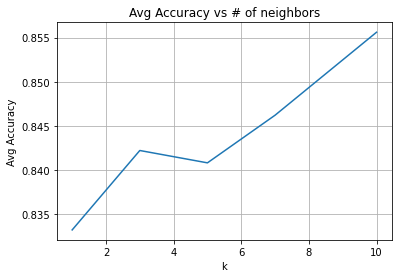

In [5]:
# Plot accuracy vs k
plt.figure()
plt.plot(k, accuracyList)
plt.grid() 
plt.xlabel('k')
plt.ylabel('Avg Accuracy')
plt.title('Avg Accuracy vs # of neighbors')
  
plt.show()